In [1]:
from datetime import date

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import ta

# Load data

In [2]:
%run get_data.ipynb

Top market cap symbols saved to data/top_cap.csv


Processing currencies: 100%|██████████| 60/60 [00:44<00:00,  1.34it/s]

Historical data saved to data/data.csv
Data range: 2024-04-08 00:00:00 to 2025-07-16 00:00:00


In [3]:
TODAY = date.today().strftime('%Y-%m-%d')
TODAY

'2025-07-17'

In [4]:
cap_df = pd.read_csv('data/top_cap.csv')
cap_df

,symbol,name,cap
0,BTCUSDT,Bitcoin,2385597841292
1,ETHUSDT,Ethereum,409098624541
2,XRPUSDT,XRP,182283866761
3,USDTUSDT,Tether,160027819906
4,BNBUSDT,BNB,104174903725
...,...,...,...
95,OPUSDT,Optimism,1268727246
96,FLRUSDT,Flare,1267154002
97,METHUSDT,Mantle Staked Ether,1254382118
98,SUSDT,Sonic,1249994350


In [5]:
df_all = pd.read_csv('data/data.csv')

df_vol = df_all[['timestamp', 'symbol', 'volume']].copy()
df_vol = df_vol.pivot(index='timestamp', columns='symbol', values='volume')
df_vol = df_vol.dropna(axis=1, how='any')

df_open = df_all[['timestamp', 'symbol', 'open']].copy()
df_open = df_open.pivot(index='timestamp', columns='symbol', values='open')
df_open = df_open.dropna(axis=1, how='any')

df_close = df_all[['timestamp', 'symbol', 'close']].copy()
df_close = df_close.pivot(index='timestamp', columns='symbol', values='close')
df_close = df_close.dropna(axis=1, how='any')

df_max = df_all[['timestamp', 'symbol', 'high']].copy()
df_max = df_max.pivot(index='timestamp', columns='symbol', values='high')
df_max = df_max.dropna(axis=1, how='any')

df_min = df_all[['timestamp', 'symbol', 'low']].copy()
df_min = df_min.pivot(index='timestamp', columns='symbol', values='low')
df_min = df_min.dropna(axis=1, how='any')

In [6]:
df_close

symbol,AAVEUSDT,ADAUSDT,ALGOUSDT,APTUSDT,ARBUSDT,ATOMUSDT,AVAXUSDT,BCHUSDT,BNBUSDT,BONKUSDT,...,SUIUSDT,TIAUSDT,TRXUSDT,UNIUSDT,USDCUSDT,VETUSDT,WBTCUSDT,WLDUSDT,XLMUSDT,XRPUSDT
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-04-08,129.18,0.6137,0.2453,14.2581,1.5694,11.305,49.86,681.4,586.40,0.000024,...,1.7099,12.480,0.12303,11.624,1.0000,0.04681,71649.70,7.308,0.1334,0.6147
2024-04-09,126.50,0.5912,0.2319,12.7333,1.4841,10.837,46.47,671.8,580.50,0.000022,...,1.5748,11.560,0.12109,11.212,1.0005,0.04355,69027.41,6.662,0.1322,0.6141
2024-04-10,128.50,0.5862,0.2305,12.2186,1.4662,10.814,47.30,629.2,609.70,0.000023,...,1.5216,11.430,0.11910,10.047,1.0000,0.04647,70591.12,6.567,0.1297,0.6172
2024-04-11,117.60,0.5858,0.2277,11.8525,1.4183,10.758,46.01,614.2,604.60,0.000022,...,1.4904,10.880,0.12030,9.139,0.9999,0.04810,69926.45,6.376,0.1302,0.6086
2024-04-12,99.81,0.5027,0.1936,9.7700,1.1737,9.371,39.34,533.2,595.60,0.000017,...,1.2394,8.830,0.11480,7.922,0.9996,0.04300,67173.54,5.476,0.1151,0.5468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-12,302.19,0.7089,0.2191,4.8040,0.3997,4.580,20.69,506.3,685.86,0.000025,...,3.4019,1.858,0.30220,8.392,0.9997,0.02363,117223.78,1.030,0.3929,2.7395
2025-07-13,305.80,0.7367,0.2638,4.9400,0.4105,4.679,21.20,508.0,692.00,0.000026,...,3.4899,1.890,0.30280,8.511,0.9996,0.02465,118836.34,1.045,0.4706,2.8361
2025-07-14,315.14,0.7352,0.2797,4.9740,0.4027,4.555,21.26,504.9,689.12,0.000027,...,3.8892,1.861,0.30250,9.131,0.9998,0.02432,119652.82,1.052,0.4636,2.9582


# Solver

In [7]:
def find_optimal_parameters(df, symbol_list=None, 
                            min_last_days=90, max_last_days=180, step_day=10,
                            min_procent=0.01, max_procent=0.3, step_procent=0.01,
                            min_std_procent=0.01, max_std_procent=0.3, step_std=0.01):
    results = {}

    if symbol_list is None:
        symbol_list = df.columns.tolist()

    for symbol in tqdm(symbol_list, desc='Processing Symbols'):
        optimal_procent = max_procent
        optimal_last_days = min_last_days
        optimal_std_procent = max_std_procent

        last_price = df[symbol].iloc[-1]

        for last_days in range(min_last_days, max_last_days + 1, step_day):
            df_slice = df[symbol].iloc[-last_days:]
            mean_val = df_slice.mean()
            df_warning_100 = df[symbol].iloc[-101:-1]
            df_warning_30 = df[symbol].iloc[-31:-1]

            for std_procent in np.arange(max_std_procent, min_std_procent, -step_std):
                std_n = mean_val * std_procent

                for procent in np.arange(max_procent, min_procent, -step_procent):
                    min_historical = df[symbol].iloc[:-31].min()
                    min_historical_coeff = min_historical * (procent + 1.0)
                    min_support_100 = df_warning_100.min()
                    min_support_30 = df_warning_30.min()
                    max_historical = df[symbol].iloc[:-31].max()
                    max_resist_100 = df_warning_100.max()
                    max_resist_30 = df_warning_30.max()
                    mean_100 = df_warning_100.mean()
                    mean_30 = df_warning_30.mean()

                    if (df_slice.std() <= std_n) and (mean_val <= min_historical_coeff) and (last_price >= min_support_30):

                        if (procent < optimal_procent or
                            (procent == optimal_procent and last_days > optimal_last_days) or
                            (procent == optimal_procent and last_days == optimal_last_days and std_procent < optimal_std_procent)):
                            optimal_procent = procent
                            optimal_last_days = last_days
                            optimal_std_procent = std_procent

        if symbol != 'BTCUSDT':
            if (optimal_procent == max_procent) & (optimal_last_days == min_last_days) & (optimal_std_procent == max_std_procent):
                continue

        results[symbol] = (optimal_procent, optimal_last_days, optimal_std_procent, 
                           min_support_100, min_support_30, min_historical, 
                           max_historical, max_resist_100, max_resist_30, 
                           last_price, mean_100, mean_30)

    results = pd.DataFrame(results).T
    results.columns = ['Optimal Procent', 'Optimal Last Days', 'Optimal Std Procent', 
                       'Min Support 100', 'Min Support 30', 'Min Historical', 
                       'Max Historical', 'Max Resist 100', 'Max Resist 30', 
                       'Last Price', 'Mean 100', 'Mean 30']
    results = results.sort_values(by=['Optimal Procent', 'Optimal Last Days', 'Optimal Std Procent'], 
                                    ascending=[True, False, False])

    return results

In [8]:
optimal_symbol = find_optimal_parameters(df_close, symbol_list=None, 
                            min_last_days=90, max_last_days=180, step_day=10,
                            min_procent=0.01, max_procent=0.3, step_procent=0.01,
                            min_std_procent=0.01, max_std_procent=0.3, step_std=0.01)

# optimal_symbol = find_optimal_parameters(df_close, symbol_list=None, 
#                             min_last_days=30, max_last_days=180, step_day=10,
#                             min_procent=0.1, max_procent=0.5, step_procent=0.1,
#                             min_std_procent=0.1, max_std_procent=0.5, step_std=0.1)

Processing Symbols: 100%|██████████| 46/46 [00:31<00:00,  1.47it/s]


In [9]:
ignore_symbols = ['USDCUSDT', 'FDUSDUSDT']
optimal_symbol = optimal_symbol[~optimal_symbol.index.isin(ignore_symbols)]

In [10]:
optimal_symbol

,Optimal Procent,Optimal Last Days,Optimal Std Procent,Min Support 100,Min Support 30,Min Historical,Max Historical,Max Resist 100,Max Resist 30,Last Price,Mean 100,Mean 30
ICPUSDT,0.12,110.0,0.07,4.555000,4.555000,4.587000,17.792000,6.177000,5.608000,5.767000,5.127890,5.016300
OPUSDT,0.13,100.0,0.14,0.486000,0.486000,0.590000,3.365000,0.910000,0.706000,0.729000,0.663980,0.572567
FILUSDT,0.15,110.0,0.10,2.069000,2.069000,2.266000,9.310000,3.245000,2.646000,2.730000,2.592690,2.351933
APTUSDT,0.15,110.0,0.09,3.930000,3.930000,4.348000,14.670000,6.138000,5.096000,5.362000,4.958350,4.644067
DOTUSDT,0.19,110.0,0.12,3.153000,3.153000,3.378000,10.673000,5.309000,4.083000,4.262000,3.992400,3.548900
SHIBUSDT,0.21,130.0,0.10,0.000011,0.000011,0.000011,0.000033,0.000017,0.000014,0.000015,0.000013,0.000012
ETCUSDT,0.22,120.0,0.08,14.070000,15.190000,14.070000,38.270000,20.700000,19.060000,20.250000,17.101800,16.870667
ATOMUSDT,0.23,110.0,0.09,3.719000,3.719000,3.580000,11.305000,5.384000,4.679000,4.872000,4.380930,4.150433
AVAXUSDT,0.26,130.0,0.11,16.150000,16.530000,16.040000,53.980000,25.820000,22.510000,23.000000,20.499700,18.632000
VETUSDT,0.26,110.0,0.13,0.019300,0.019300,0.019390,0.077900,0.032270,0.025200,0.026180,0.024519,0.021749


In [11]:
result = optimal_symbol.index.to_list()

In [12]:
result = result[:10]
result

['ICPUSDT',
 'OPUSDT',
 'FILUSDT',
 'APTUSDT',
 'DOTUSDT',
 'SHIBUSDT',
 'ETCUSDT',
 'ATOMUSDT',
 'AVAXUSDT',
 'VETUSDT']

# Побудова графіку

In [78]:
def paint_result(df, 
                 result, 
                 info_df, 
                 cap_df, 
                 volume_df, 
                 df_open, 
                 df_max, 
                 df_min,
                 last_days=365):
    
    last_days = max(last_days, 100)

    num_symbols = len(result)
    fig, axes = plt.subplots(nrows=num_symbols, ncols=1, figsize=(16, 6 * num_symbols), sharex=False)

    if num_symbols == 1:
        axes = [axes]

    global_norm = pd.DataFrame()
    for symbol in result:
        series = df[symbol].iloc[-last_days:]
        norm_series = (series - series.min()) / (series.max() - series.min())
        global_norm[symbol] = norm_series
    global_line = global_norm.mean(axis=1)

    df_rsi = pd.DataFrame()
    for symbol in result:
        df_rsi[symbol] = ta.momentum.RSIIndicator(close=df[symbol], window=30).rsi()

    for idx, symbol in enumerate(result):
        series = df[symbol].iloc[-last_days:]
        volume_series = volume_df[symbol].iloc[-last_days:]
        ax = axes[idx]

        # ==== RSI Series ====
        rsi_series = df_rsi[symbol].iloc[-last_days:]
        last_rsi = rsi_series.dropna().iloc[-1]

        # ==== Графік ціни ====
        series.plot(ax=ax, label='Price', color='gray', linewidth=1.5)

        # ==== Глобальна лінія ====
        global_scaled = global_line * (series.max() - series.min()) + series.min()
        global_scaled.plot(ax=ax, label='Global Mean', color='black', linestyle='dotted', linewidth=0.5)

        # ==== 100-денна ковзна ====
        ma100_full = df[symbol].rolling(window=100).mean()
        ma100 = ma100_full.iloc[-last_days:]
        ma100.plot(ax=ax, color='blue', linestyle='-', linewidth=1.2, label='MA 100')

        ma100_global = global_scaled.rolling(window=100).mean()
        ma100_global.plot(ax=ax, color='blue', linestyle='dotted', linewidth=0.5, label='Global MA 100')
        # ==== 30-денна ковзна ====
        ma30_full = df[symbol].rolling(window=30).mean()
        ma30 = ma30_full.iloc[-last_days:]
        ma30.plot(ax=ax, color='orange', linestyle='-', linewidth=1.2, label='MA 30')

        # ==== Лінії підтримки та опору ====
        symbol_cap = cap_df[cap_df['symbol'] == symbol]['cap'].values[0] / 1_000_000_000
        min_support_100 = info_df.loc[symbol, 'Min Support 100']
        max_resist_100 = info_df.loc[symbol, 'Max Resist 100']
        min_support_30 = info_df.loc[symbol, 'Min Support 30']
        max_resist_30 = info_df.loc[symbol, 'Max Resist 30']
        last_price = info_df.loc[symbol, 'Last Price']
        max_historical = info_df.loc[symbol, 'Max Historical']

        # ==== Розрахунок TP та SL ====
        TP = (max_resist_100 + max_resist_30) / 2
        profit_pct = ((TP - last_price) / last_price) * 100

        atr_series = ta.volatility.AverageTrueRange(
            high=df_max[symbol],
            low=df_min[symbol],
            close=df[symbol],
            window=30
        ).average_true_range()
        last_atr = atr_series.dropna().iloc[-1]
        SL = last_price - last_atr * 2.5

        # ==== Фарбування ділянок підтримки та опору ====
        ax.axhspan(min_support_100, max_resist_100, color='lightgreen', alpha=0.1)
        ax.axhspan(max_resist_30, max_resist_100, color='red', alpha=0.1)

        ax.axhline(last_price, color='green', linestyle='--',
                   label=f"Last Price ({last_price:.2f})")
        ax.text(series.index[-1], last_price, f' {last_price:.2f}', 
                verticalalignment='bottom', color='green', fontsize=10)
        
        ax.axhline(min_support_100, color='gray', linestyle='dotted',
                   label=f"Min Support 100 ({min_support_100:.2f})")
        ax.axhline(min_support_30, color='orange', linestyle='--',
                   label=f"Min Support 30 ({min_support_30:.2f})")

        ax.axhline(max_resist_100, color='gray', linestyle='dotted',
                   label=f"Max Resist 100 ({max_resist_100:.2f})")
        ax.axhline(max_resist_30, color='gray', linestyle='dotted',
                   label=f"Max Resist 30 ({max_resist_30:.2f})")
        
        ax.axhline(info_df.loc[symbol, 'Min Historical'], color='red', linestyle='--',
                   label=f"Min Historical ({info_df.loc[symbol, 'Min Historical']:.2f})")
        ax.axhline(info_df.loc[symbol, 'Max Historical'], color='red', linestyle='--',
                   label=f"Max Historical ({info_df.loc[symbol, 'Max Historical']:.2f})")
        
        if last_price > max_historical:
            ax.axhspan(max_historical, last_price, color='yellow', alpha=0.5, label='Above Max Historical')

        # ==== Найбільший обʼєм за останні 100 днів ====
        vol_max_idx_100 = volume_series[-100:].idxmax()
        vol_mean_100 = volume_series[-100:].mean()
        if volume_series[vol_max_idx_100] > vol_mean_100 * 3:
            price_at_vol_max_100 = series.loc[vol_max_idx_100]
            pos_100 = series.index.get_loc(vol_max_idx_100)

            ax.text(pos_100, price_at_vol_max_100, f' {price_at_vol_max_100:.2f}', 
                    verticalalignment='bottom', color='red', fontsize=10)

        # ==== Найбільший обʼєм за останні 30 днів ====
        vol_max_idx_30 = volume_series[-30:].idxmax()
        vol_mean_30 = volume_series[-30:].mean()
        if volume_series[vol_max_idx_30] > vol_mean_30 * 3:
            price_at_vol_max_30 = series.loc[vol_max_idx_30]
            pos_30 = series.index.get_loc(vol_max_idx_30)

            ax.text(pos_30, price_at_vol_max_30, f' {price_at_vol_max_30:.2f}', 
                    verticalalignment='bottom', color='red', fontsize=10)

        # ==== Лінії часу ====
        if len(series) >= 100:
            pos_30 = len(series) - 30
            pos_100 = len(series) - 100
            
            ax.axvline(pos_30, color='gray', linestyle=':', label='30 Days Ago')
            ax.axvline(pos_100, color='gray', linestyle=':', label='100 Days Ago')

        # ==== Накладання обʼєму ====
        ax.set_title(f"{symbol} ({symbol_cap:.2f}B USD) — Potential Profit: {profit_pct:.2f}% (SL: {SL:.2f}, TP: {TP:.2f})", fontsize=14)
        ax.legend(loc='upper left', fontsize=10)
        ax.grid(True, linestyle='--', alpha=0.5)

        lower_limit = min_support_100 * 0.9
        upper_limit = max_resist_100 * 1.1
        ax.set_ylim(lower_limit, upper_limit)
        vol_scaled = volume_series / volume_series.max() * (upper_limit - lower_limit) * 0.2 + lower_limit
        ax.fill_between(vol_scaled.index, vol_scaled, color='gray', alpha=0.3, label='Volume (scaled)')

        # ==== CANDLE PATTERNS ====
        open_series = df_open[symbol].iloc[-last_days:]
        high_series = df_max[symbol].iloc[-last_days:]
        low_series = df_min[symbol].iloc[-last_days:]
        close_series = series

        # Візьмемо останні 100 днів для голосування патернів
        last_100_dates = series.index[-100:]

        # Голосування за напрямок: рахунок "вгору" і "вниз"
        votes_up = 0.0
        votes_down = 0.0
        votes_neutral = 0.0

        # Одно-свічкові патерни (hammer, inverted hammer, doji)
        for date in last_100_dates:
            o = open_series.loc[date]
            h = high_series.loc[date]
            l = low_series.loc[date]
            c = close_series.loc[date]
            body = abs(c - o)
            candle_range = h - l
            lower_shadow = min(c, o) - l
            upper_shadow = h - max(c, o)
            vol = volume_series.loc[date]
            vol_mean_100 = volume_series[-100:].mean()
            vol_weight = vol / vol_mean_100 if vol_mean_100 > 0 else 1

            # hammer (позитивний сигнал)
            if candle_range > 0 and body < candle_range * 0.3 and lower_shadow > body * 2:
                ax.scatter(date, l, color='green', s=20, marker='P',
                        label='Hammer' if 'Hammer' not in ax.get_legend_handles_labels()[1] else "")
                votes_up += 1 * vol_weight

            # inverted hammer (негативний сигнал)
            if candle_range > 0 and body < candle_range * 0.3 and upper_shadow > body * 2 and lower_shadow < body * 0.5:
                ax.scatter(date, h, color='red', s=20, marker='P',
                        label='Inverted Hammer' if 'Inverted Hammer' not in ax.get_legend_handles_labels()[1] else "")
                votes_down += 1 * vol_weight

            # doji — сумнівний сигнал (не враховуємо в голосуванні)
            if candle_range > 0 and body < candle_range * 0.1:
                ax.scatter(date, c, color='orange', s=30, marker='D',
                           label='Doji' if 'Doji' not in ax.get_legend_handles_labels()[1] else "")
                votes_neutral += 1 * vol_weight

        # Три-свічкові патерни (Morning Star, Evening Star)
        for i in range(2, len(last_100_dates)):
            date = last_100_dates[i]
            date_prev1 = last_100_dates[i-1]
            date_prev2 = last_100_dates[i-2]

            o1, c1 = open_series.loc[date_prev2], close_series.loc[date_prev2]
            o2, c2 = open_series.loc[date_prev1], close_series.loc[date_prev1]
            o3, c3 = open_series.loc[date],       close_series.loc[date]

            h1, l1 = high_series.loc[date_prev2], low_series.loc[date_prev2]
            h2, l2 = high_series.loc[date_prev1], low_series.loc[date_prev1]
            h3, l3 = high_series.loc[date],       low_series.loc[date]

            body1 = abs(c1 - o1)
            body2 = abs(c2 - o2)
            body3 = abs(c3 - o3)

            vol = volume_series.loc[date]
            vol_weight = vol / volume_series[-100:].mean() if volume_series[-100:].mean() > 0 else 1

            # Morning Star — сигнал на підйом
            if (c1 < o1 and body1 > (h1 - l1) * 0.5 and
                body2 < body1 * 0.3 and
                c3 > o3 and body3 > (h3 - l3) * 0.5 and
                c3 > ((c1 + o1)/2)):
                votes_up += 3 * vol_weight
                ax.scatter(date, c3, color='green', s=80, marker='*',
                        label='Morning Star' if 'Morning Star' not in ax.get_legend_handles_labels()[1] else "")

            # Evening Star — сигнал на падіння
            if (c1 > o1 and body1 > (h1 - l1) * 0.5 and
                body2 < body1 * 0.3 and
                c3 < o3 and body3 > (h3 - l3) * 0.5 and
                c3 < ((c1 + o1)/2)):
                votes_down += 3 * vol_weight
                ax.scatter(date, c3, color='red', s=80, marker='*',
                        label='Evening Star' if 'Evening Star' not in ax.get_legend_handles_labels()[1] else "")

        # Дво-свічкові патерни (Bullish Engulfing, Bearish Engulfing)
        for i in range(1, len(last_100_dates)):
            date = last_100_dates[i]
            date_prev = last_100_dates[i-1]

            h = high_series.loc[date]
            l = low_series.loc[date]

            o_prev, c_prev = open_series.loc[date_prev], close_series.loc[date_prev]
            o_curr, c_curr = open_series.loc[date],     close_series.loc[date]

            vol = volume_series.loc[date]
            vol_weight = vol / volume_series[-100:].mean() if volume_series[-100:].mean() > 0 else 1

            # Bullish Engulfing — вгору
            if (c_prev < o_prev and
                c_curr > o_curr and
                o_curr < c_prev and
                c_curr > o_prev):
                votes_up += 2 * vol_weight
                ax.scatter(date, l, color='green', s=30, marker='^',
                        label='Engulfing Bullish' if 'Engulfing Bullish' not in ax.get_legend_handles_labels()[1] else "")

            # Bearish Engulfing — вниз
            if (c_prev > o_prev and
                c_curr < o_curr and
                o_curr > c_prev and
                c_curr < o_prev):
                votes_down += 2 * vol_weight
                ax.scatter(date, h, color='red', s=30, marker='v',
                        label='Engulfing Bearish' if 'Engulfing Bearish' not in ax.get_legend_handles_labels()[1] else "")

        # ==== Визначення підсумкового напрямку з балами ====
        total_votes = int(abs(votes_up - votes_down) - votes_neutral)
        scores = f"{total_votes} (U:{votes_up:.1f} D:{votes_down:.1f})"
        if votes_up > votes_down and total_votes > 0:
            direction = f"⬆️ Up {scores}"
        elif votes_down > votes_up and total_votes > 0:
            direction = f"⬇️ Down {scores}"
        else:
            direction = f"➡️ Sideways {scores}"

        # ==== Визначення сигналів на вхід та вихід ====
        entry_signal = False
        exit_signal = False

        rsi_overbought = 70
        rsi_oversold = 30

        entry_score = (
            2 * int((votes_up > votes_down) and (total_votes > 0)) +        # Патерни кажуть "вгору"
            2 * int(last_price <= min_support_100 * 1.5) +                   # Ціна біля підтримки
            1 * int(ma30.iloc[-1] > ma100.iloc[-1]) +                       # Тренд зростаючий
            2 * int(last_rsi < rsi_overbought) +                            # RSI не перегрітий
            1 * int(last_price <= max_resist_30) +                          # Ще є куди рости
            2 * int(volume_series.iloc[-1] > volume_series[-30:].mean())    # Підтверджено обʼємом
        )
        if entry_score >= 8: 
            entry_signal = True

        exit_score = (
            2 * int((votes_down > votes_up) and (total_votes > 0)) +        # Патерни вниз
            2 * int(last_price >= max_resist_100 * 0.75) +                    # Ціна майже біля опору
            1 * int(ma30.iloc[-1] < ma100.iloc[-1]) +                       # Тренд спадний
            2 * int(last_rsi > rsi_oversold) +                              # RSI не перепроданий
            1 * int(last_price >= min_support_30) +                         # Підтримка пробита
            2 * int(volume_series.iloc[-1] > volume_series[-30:].mean())    # Підтверджено обʼємом
        )
        if exit_score >= 8:
            exit_signal = True

        if entry_signal:
            signal_text = "BUY"
        elif exit_signal:
            signal_text = "SELL"
        else:
            signal_text = "HOLD"

        # ==== Додаємо напрямок у заголовок ====
        ax.set_title(f"{symbol} ({symbol_cap:.2f}B USD) | Profit: {profit_pct:.2f}% SL: {SL:.2f} TP: {TP:.2f} | "
                     f"RSI: {last_rsi:.1f} ATR: {last_atr:.2f} | Trend: {direction} Signal: {signal_text}", fontsize=14)

        # ==== Налаштування графіка ====
        ax.set_xlabel('Date', fontsize=12)
        ax.legend(loc='upper left', fontsize=10)
        ax.grid(True, linestyle='--', alpha=0.5)

        lower_limit = min_support_100 * 0.9
        upper_limit = max_resist_100 * 1.1
        ax.set_ylim(lower_limit, upper_limit)
        vol_scaled = volume_series / volume_series.max() * (upper_limit - lower_limit) * 0.2 + lower_limit
        ax.fill_between(vol_scaled.index, vol_scaled, color='gray', alpha=0.3, label='Volume (scaled)')

    plt.tight_layout()
    plt.savefig(f'pdf_store/{TODAY}.pdf', dpi=300, bbox_inches='tight')
    try:
        plt.savefig(f'/Users/aleksejkitajskij/Library/Mobile Documents/com~apple~CloudDocs/bit_research/{TODAY}.pdf', dpi=300, bbox_inches='tight')
    except Exception as e:
        print(f"Error saving PDF to iCloud")
    plt.show()

In [79]:
def paint_all(df, symbols, last_days=365):
    data = df[symbols].iloc[-last_days:].copy()

    for symbol in symbols:
        series = data[symbol]
        min_val = series.min()
        max_val = series.max()
        data[symbol] = (series - min_val) / (max_val - min_val)

    plt.figure(figsize=(16,8))
    x = range(len(data))
    for symbol in symbols:
        plt.plot(x, data[symbol], label=symbol, linewidth=1.0)
    
    plt.title(f'Normalized Price Chart for {len(symbols)} Symbols (last {last_days} days)')
    plt.xlabel('Date')
    plt.ylabel('Normalized Price (0-1)')
    plt.legend()
    plt.show()


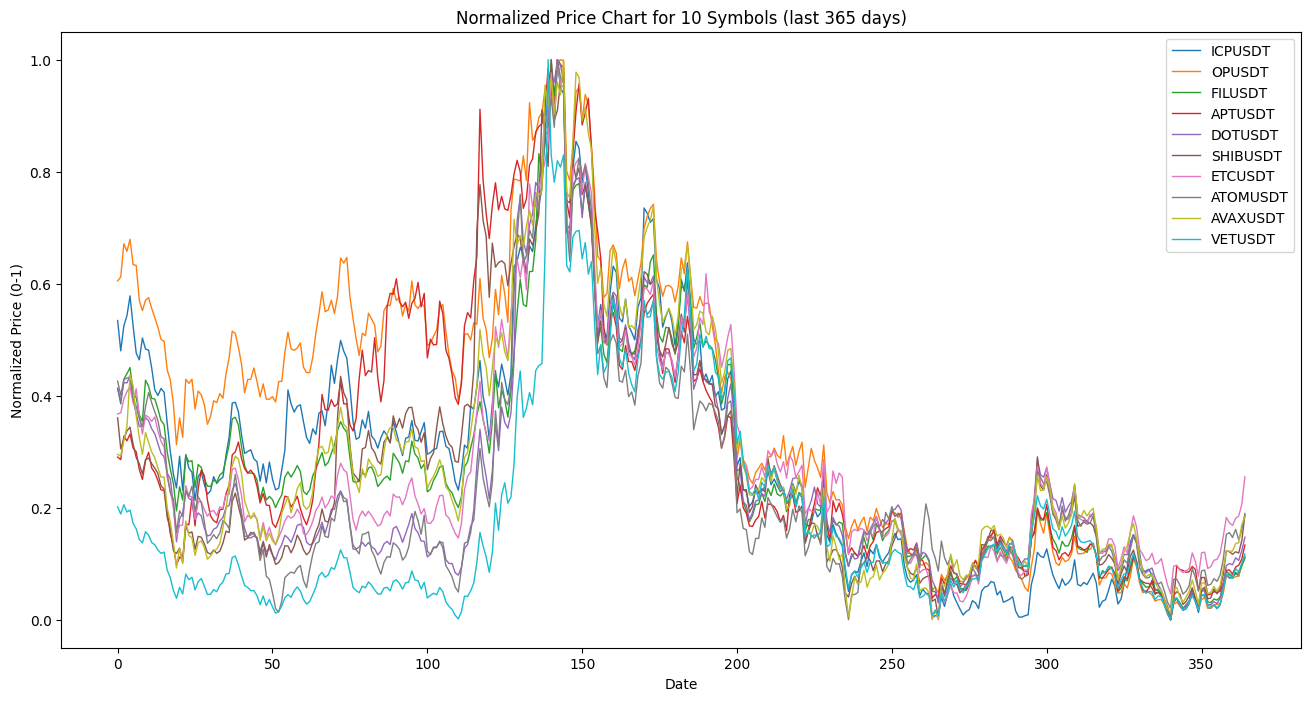

In [80]:
paint_all(df_close, result, last_days=365)

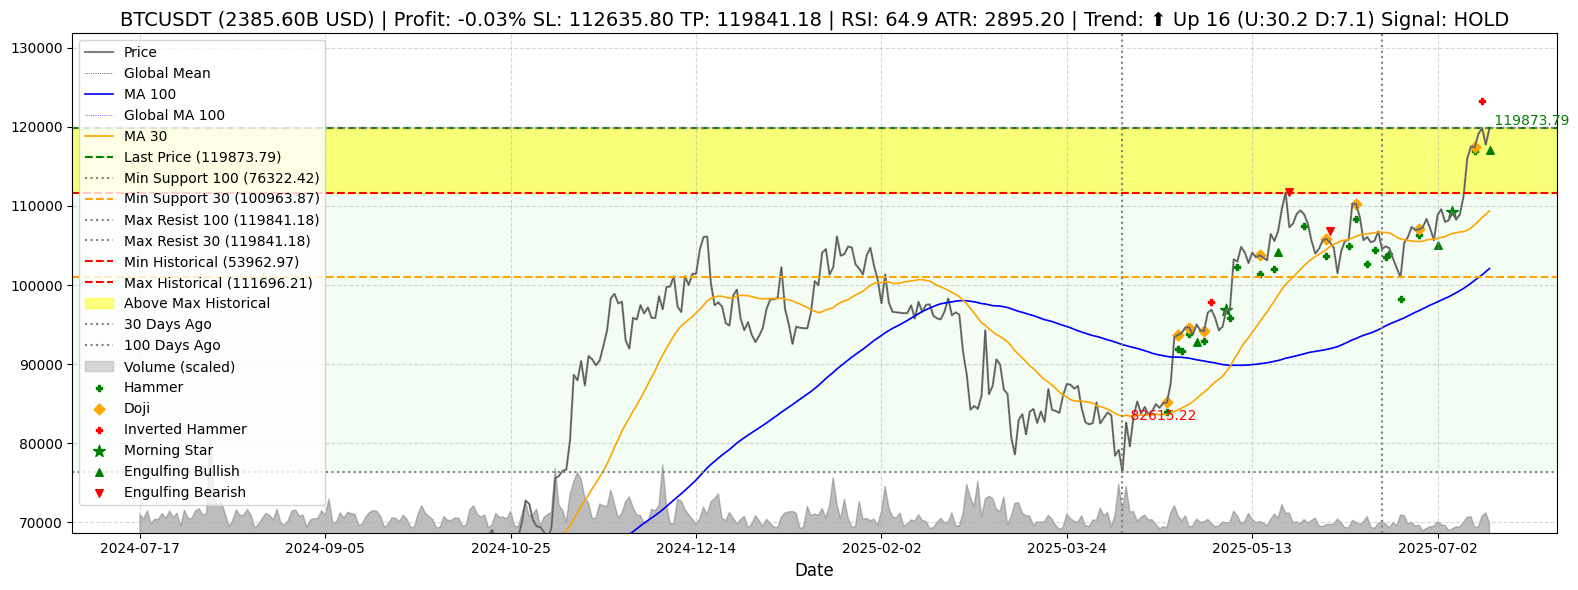

In [81]:
paint_result(df_close, ['BTCUSDT'], optimal_symbol, cap_df, df_vol, df_open, df_max, df_min, last_days=365)

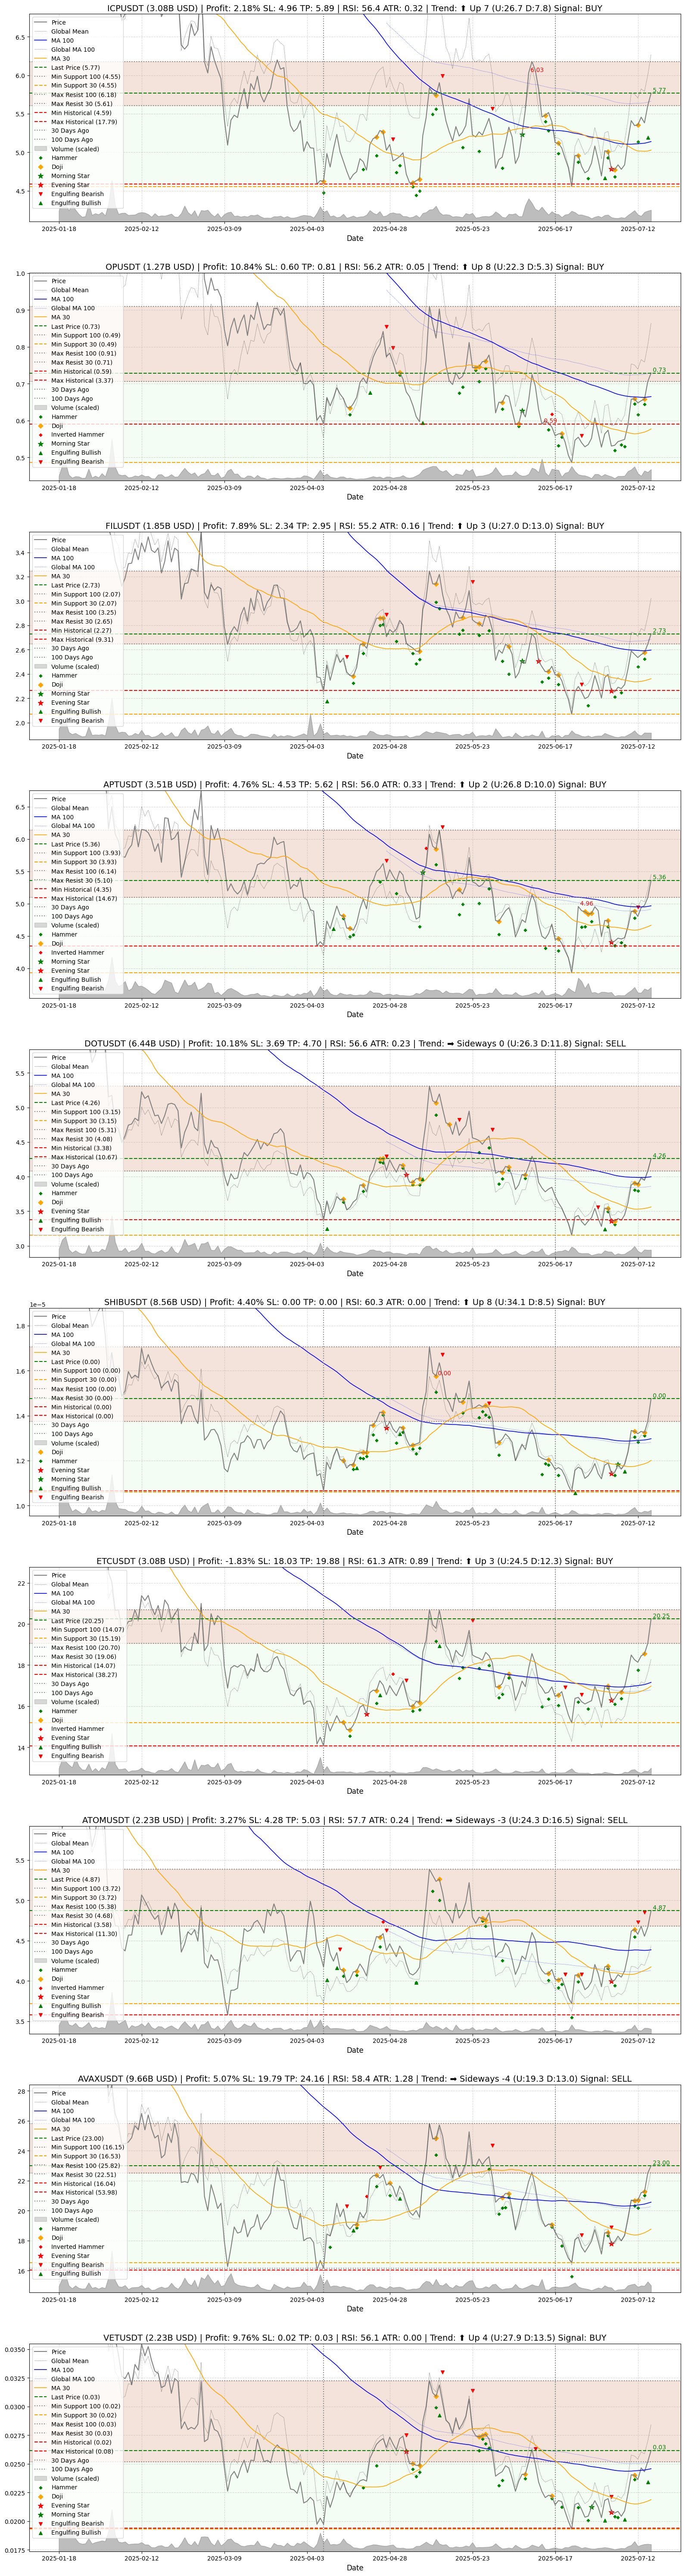

In [82]:
paint_result(df_close, result, optimal_symbol, cap_df, df_vol, df_open, df_max, df_min, last_days=180)